<div class="alert alert-info">
<font size="5"><b>Комментарий ревьюера 2</b></font>

Привет еще раз. Спасибо, что доделал работу. Оформление комментариев по работе сохраняется. Только обозначим, что это вторая итерация.

</div>

<div class="alert alert-info">
<font size="5"><b>Комментарий ревьюера</b></font>

Привет, Роман! Спасибо, что прислал задание:) Поздравляю с приближением к концу второго модуля. Меня зовут Слепцов Артем и я буду проверять твой проект) Ты проделал большую работу над проектом. Он выполнен уже на достойном уровне. Однако есть моменты, которые еще можно улучшить. Будет здорово, если ты, надеюсь, не против, если я буду на ты, будешь отвечать на комментарии и участвовать в диалоге. Если обращение на ты неприемлемо, то прошу сообщить.

Мои комментарии обозначены пометкой **Комментарий ревьюера**. Далее в файле ты сможешь найти их в похожих ячейках:
    
<div class="alert alert-success">Успех: Если фон комментария зелёный - всё сделано правильно. Рекомендации укажу таким же цветом;</div>
        
<div class="alert alert-warning">Совет: Оранжевый - некритичные замечания;</div>
        
<div class="alert alert-danger">Ошибка: Красный - нужно переделать. </div>
        
Не удаляй эти комментарии и постарайся учесть их в ходе выполнения данного проекта. Свои же комментарии ты можешь обозначать любым заметным способом.

</div>

# Cтартап, который продаёт продукты питания

Мы работаем в стартапе, который продаёт продукты питания. <br>
Нужно разобраться, как ведут себя пользователи нашего мобильного приложения.<br>
Изучим воронку продаж. Узнаем, как пользователи доходят до покупки.<br>
После этого исследуем результаты A/A/B-эксперимента. <br>
Дизайнеры захотели поменять шрифты во всём приложении, а менеджеры испугались, что пользователям будет непривычно. <br>
Договорились принять решение по результатам A/A/B-теста. <br>
Пользователей разбили на 3 группы: 2 контрольные со старыми шрифтами и одну экспериментальную — с новыми. <br>
Выясним, какой шрифт лучше.<br>

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех: Вступление в работу очень важно. Так ты поясняешь то, чему она посвящена. Цель работы также хорошо бы вынести в отдельный блок вступления. Еще лучше будет, если ты сделаешь план работы с гиперссылками. Да, есть плагин ToC. Но хорошо бы уметь реализовывать интерактивный план проекта вручную. Как это реализовать - смотри по [ссылке](https://stackoverflow.com/questions/49535664/how-to-hyperlink-in-a-jupyter-notebook/49717704).

</div>

In [6]:
import pandas as pd
import math as mth
from scipy import stats as st
import matplotlib.pyplot as plt
from plotly import graph_objects as go

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех: Правильно, что весь импорт ты проводишь в первой ячейке работы. Так твой коллега, запускающий работу, будет в курсе используемых в ней библиотек и сможет при необходимости быстро настроить окружение.

</div>

## Шаг 1. Откроем файл с данными и изучим общую информацию

In [7]:
df = pd.read_csv('logs_exp.csv', sep= '\t' )

In [8]:
df.info()
print('duplicated sum:', df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   EventName       244126 non-null  object
 1   DeviceIDHash    244126 non-null  int64 
 2   EventTimestamp  244126 non-null  int64 
 3   ExpId           244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB
duplicated sum: 413


Удалим 413 дубликатов, переведем столбцы в змеиный_регистр, переведем дату и время в формат dt, а так же создаим отдельный столбец дат

## Шаг 2. Подготовим данные

In [9]:
df = df.drop_duplicates().reset_index(drop=True)
df.rename(columns={'EventName': 'event_name', 'DeviceIDHash': 'device_id_hash',
                   'EventTimestamp': 'event_timestamp', 'ExpId': 'exp_id'}, inplace=True)
df['event_timestamp'] = pd.to_datetime(df['event_timestamp'], unit='s')
df['event_date'] = pd.to_datetime(df['event_timestamp'].dt.date)

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех: Подумай также о возможных причинах появления дубликатов в данных. Первый взгляд на таблицу выполнен.

</div>

## Шаг 3. Изучим и проверим данные

### Сколько всего событий в логе:

In [10]:
total_event = df['event_name'].value_counts()
print(total_event)
print('total:', total_event.sum())

event_name
MainScreenAppear           119101
OffersScreenAppear          46808
CartScreenAppear            42668
PaymentScreenSuccessful     34118
Tutorial                     1018
Name: count, dtype: int64
total: 243713


### Сколько всего пользователей в логе:

In [11]:
total_users = df['device_id_hash'].nunique()
print('total users:', total_users)

total users: 7551


### Сколько в среднем событий приходится на пользователя?


In [12]:
print(f'Среднее количество событий на пользователя: {total_event.sum() / total_users :0.0f}')

Среднее количество событий на пользователя: 32


<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех: Как думаешь, 32 события на пользователя - это много?

</div>

### Данными за какой период мы располагаем:

date min: 2019-07-25 00:00:00
date max: 2019-08-07 00:00:00


array([[<Axes: title={'center': 'event_timestamp'}>]], dtype=object)

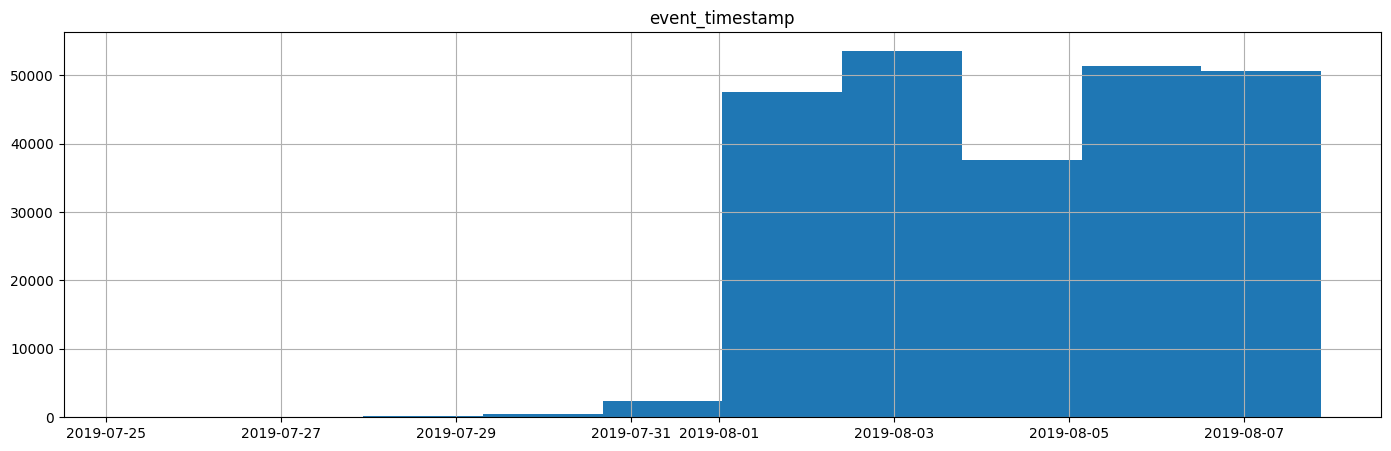

In [13]:
print('date min:', df['event_date'].min())
print('date max:',df['event_date'].max())

df.hist(column='event_timestamp', figsize=(17,5))

In [14]:
deleted_df = df.query('event_date < "2019-08-01"')
new_df = df.query('event_date > "2019-07-31"')

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех: Верный выбор. Число строк до данной даты у нас незначительное.
    
</div>

### Много ли событий и пользователей мы потеряли, отбросив старые данные:

In [15]:
deleted_events = deleted_df['event_name'].value_counts()
print(f'Мы отсекли: {deleted_events.sum()} евентов')
print(f'Это {(deleted_events.sum() / total_event.sum()) * 100:.2f}% от всех евентов в датасете')

Мы отсекли: 2826 евентов
Это 1.16% от всех евентов в датасете


In [16]:
deleted_users = total_users - new_df['device_id_hash'].nunique()
print(f'Мы отсекли: {deleted_users} пользователя')
print(f'Это {(deleted_users / total_users) * 100:.2f}% от всех пользователей в датасете')

Мы отсекли: 17 пользователя
Это 0.23% от всех пользователей в датасете


<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>

Ошибка: Не слишком много данных удалено. Здорово, что ты проверил объем удаленных данных по общему числу строк. Стоит рассчитать и число удаленных пользователей. Заметь, что большая часть пользователей из июля продолжили использование приложения в августе. Выше мы нашли число пользователей до фильтрации. Рассчитай их после фильтрации. Разница между данными показателями и будет числом удаленных пользователей.  
    
</div>

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера 2</b></font>

Успех: Да, все верно.

</div>

### Проверим, что у нас есть пользователи из всех трёх экспериментальных групп.

In [17]:
check_group = pd.DataFrame(
    data=df['exp_id'].value_counts().items(),
    columns=['group', 'events_count']
).merge(
    pd.DataFrame(data=new_df['exp_id'].value_counts().items(),
                 columns=['group', 'events_count']
                ), on='group')
check_group['difference'] = round(1 - check_group['events_count_y'] / check_group['events_count_x'], 3)
check_group

,group,events_count_x,events_count_y,difference
0,248,85582,84563,0.012
1,246,80181,79302,0.011
2,247,77950,77022,0.012


## Шаг 4. Изучим воронку событий

### Посмотрим, какие события есть в логах, как часто они встречаются. Отсортируем события по частоте.

In [18]:
new_df['event_name'].value_counts().sort_values()

,count
event_name,
Tutorial,1005
PaymentScreenSuccessful,33918
CartScreenAppear,42303
OffersScreenAppear,46333
MainScreenAppear,117328


### Посчитаем, сколько пользователей совершали каждое из этих событий.

In [19]:
test = new_df.groupby('event_name').agg({'device_id_hash':'nunique'}).sort_values(by='device_id_hash',
                                                                                  ascending=False)
test['new'] = round(test['device_id_hash'] / new_df['device_id_hash'].nunique() * 100, 2)
test

,device_id_hash,new
event_name,,
MainScreenAppear,7419,98.47
OffersScreenAppear,4593,60.96
CartScreenAppear,3734,49.56
PaymentScreenSuccessful,3539,46.97
Tutorial,840,11.15


<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех: Даже на первом шаге воронки мы не имеем конверсии 1. О чем это может нам говорить? Обязателен ли проход через все шаги воронки?
    
</div>

MainScreenAppear - OffersScreenAppear - CartScreenAppear - PaymentScreenSuccessful <br>
Tutorial не обязательно. Так же не обязательно проходить через все шаги воронки (видимо в поисковике есть ссылки сразу на офферы/туториал...)

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех: Последовательность событий определена. Соглашусь, tutorial не относится к ней. Этот шаг является обучением и не относится к последовательности событий.  
    
Также можно добавить и группировку по номеру эксперимента (246, 247, 248) с расчетом числа пользователей на каждом шаге воронки. Так мы посмотрим на то, согласуются ли данные разных групп между собой.  
    
</div>

### Построим воронку событий

In [20]:
test.reset_index()

,event_name,device_id_hash,new
0,MainScreenAppear,7419,98.47
1,OffersScreenAppear,4593,60.96
2,CartScreenAppear,3734,49.56
3,PaymentScreenSuccessful,3539,46.97
4,Tutorial,840,11.15


In [21]:
test = test.reset_index().query('event_name not in "Tutorial"')
fig = go.Figure(go.Funnel(
    y = test['event_name'],
    x = test['device_id_hash'],
    textposition = "inside",
    textinfo = "value+percent initial"
    ))
fig.show()

Самое "узкое" место  с MainScreenAppear на OffersScreenAppear, на этом шаге мы теряем больше всего пользователей.  <br>
Вероятно пользователям не очень нравится дизайн главной страницы и они сразу уходят. <br>
48% пользователей доходят до страницы "оплачено"

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех: Крутая визуализация. Воронку мы изучили. Около половины клиентов доходит с первого этапа до последнего.
    
</div>

## Шаг 5. Изучим результаты эксперимента

### Сколько пользователей в каждой экспериментальной группе:

In [22]:
new_df.groupby('exp_id').agg({'device_id_hash':'nunique'})

,device_id_hash
exp_id,
246,2484
247,2513
248,2537


<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех: Правильно, что ты проверил равенство размеров групп. Однако их размеры несколько различаются. Это говорит нам о неоптимальности разбиения данных по группам. Для будущих тестов следует несколько поработать с механикой выделения групп и, возможно, изменить подход к их выделению.
    
</div>

Количество пользователей во всех группах различается более чем на 0,5%. Дальнейшие выводы не показательны. <br>
Нужно разобраться с механизмом деления пользователей по группам и повторно собрать данные. <br>
Дальше я буду исследовать только для того, что бы после того как появяться новые данные просто загрузить их в эту тетрадку.

In [23]:
new_df = new_df.query('event_name not in "Tutorial"')
g_246 = new_df.query('exp_id == 246')
g_247 = new_df.query('exp_id == 247')
g_248 = new_df.query('exp_id == 248')

In [24]:
print(len(set(g_246['device_id_hash']).intersection(set(g_247['device_id_hash']))))
print(len(set(g_247['device_id_hash']).intersection(set(g_248['device_id_hash']))))

0
0


В группах нету одинаковых пользователей.

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех: Важное наблюдение.
    
</div>

In [25]:
def _group(group):
    return group.groupby('event_name').agg({'device_id_hash':'nunique'}).sort_values(by='device_id_hash',
                                                                          ascending=False).reset_index()

def event_z_test(group_1, group_2):
    trials = [group_1['device_id_hash'].nunique(), group_2['device_id_hash'].nunique()]
    group_1, group_2 = _group(group_1), _group(group_2)
    for event_name in group_1['event_name']:
        for g_1, g_2 in zip(group_1.query('event_name == @event_name')['device_id_hash'],
                            group_2.query('event_name == @event_name')['device_id_hash']):
            z_test(trials, [g_1, g_2], event_name)

def z_test(trials, successes, event_name, alpha=.05):
    p1 = successes[0] / trials[0]
    p2 = successes[1] / trials[1]
    p_combined = (successes[0] + successes[1]) / (trials[0] + trials[1])
    difference = p1 - p2
    z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/trials[0] + 1/trials[1]))
    distr = st.norm(0, 1)
    p_value = (1 - distr.cdf(abs(z_value))) * 2
    print(f'{event_name} p-значение: {p_value}')

    if p_value < alpha:
        print("Отвергаем нулевую гипотезу: между долями есть значимая разница")
    else:
        print("Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными")

In [26]:
a_1, a_2, b_1 = g_246, g_247, g_248

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех: Правильно, что ты создал функцию для проведения теста. Действительно, тестов проводить много, так что она не будет лишней.
    
    
</div>

<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>

Ошибка: Однако при нахождении конверсии ты делишь на сумму по столбцу с пользователями. В итоге пользователей, прошедших весь путь, ты учтешь 4 или 5 раз. Из-за это мы получаем искаженные результаты. Делить же стоит на число уникальных пользователей в данных. Сумма по столбцу id не несет в себе смысла, т.к. один пользователь проходит нескоолько этапов. Пользователя 1 ты учтешь в таком суммировании 2 раза, пользователя 2 - 3 раза, пользователя 3 - 4 раза (он прошел все этапы воронки) и т.д. Делить для нахождения конверсий стоит на общее число уникальных пользователей в данных. Этот показатель у тебя рассчитан в ячейке 16. Исправь данную неточность.

</div>

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера 2</b></font>

Успех: Теперь функция корректна. Так мы учитываем всех пользователей.

</div>

### Выберем самое популярное событие, посчитаем число пользователей, совершивших это событие в каждой из контрольных групп. Посчитайте долю пользователей, совершивших это событие. Проверим, будет ли отличие между группами статистически достоверным.

Нулевая гипотиза будет звучать так: "Доли разные"

In [28]:
pop_event = _group(new_df).head(1)
print('Самое популярное событие:', pop_event['event_name'][0])

a_a_pop_event = [a_1.query('event_name == @pop_event["event_name"][0]')['device_id_hash'].nunique(),
                 a_2.query('event_name == @pop_event["event_name"][0]')['device_id_hash'].nunique()]

a_a_payment = [a_1.query('event_name == "PaymentScreenSuccessful"')['device_id_hash'].nunique(),
               a_2.query('event_name == "PaymentScreenSuccessful"')['device_id_hash'].nunique()]

a_a_total = [a_1['device_id_hash'].nunique(), a_2['device_id_hash'].nunique()]

print(f'Доля пользователей совершивших cамое популярное событие в группе A1: {a_a_pop_event[0] / a_a_total[0]:.2f}, \
в группе A2: {a_a_pop_event[1] / a_a_total[1]:.2f}')

z_test(a_a_total, a_a_payment, pop_event['event_name'][0])

Самое популярное событие: MainScreenAppear


ValueError: data type must provide an itemsize

Притензии к распределению пользователей есть выше. Но статистически группы не разные.

### Проделаем то же самое для всех других событий

Нулевая гипотиза будет звучать так: "Доли одинаковые"

In [29]:
event_z_test(a_1, a_2)

MainScreenAppear p-значение: 0.7526703436483038
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
OffersScreenAppear p-значение: 0.24786096925282264
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
CartScreenAppear p-значение: 0.22867643757335676
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
PaymentScreenSuccessful p-значение: 0.11446627829276612
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


### Аналогично поступим с группой с изменённым шрифтом. Сравним группу А1 и В

Нулевая гипотиза будет звучать так: "Доли одинаковые"

In [ ]:
event_z_test(a_1, b_1)

Результат в группе А1/В не показал стат.значимых различий. Шрифты не повлияли на конверсию.

### Сравним группу А2 и В

Нулевая гипотиза будет звучать так: "Доли одинаковые"

In [ ]:
event_z_test(a_2, b_1)

Результат в группе А2/В не показал стат.значимых различий. Шрифты не повлияли на конверсию.

Уровень значимости мы приняли 5%. Смысла ставить уровень значимости 1% просто нету.

<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>

Ошибка: Скорректируй ошибку в функции при проведении тестов. Посмотри на получаемые результаты. Также нас просят провести стат. тест для объединенной группы А1+А2 и сравнить с группой В. Дополни раздел еще одним блоком тестов.
</div>

Нулевая гипотиза будет звучать так: "Доли одинаковые"

In [ ]:
event_z_test(pd.concat([a_1, a_2]), b_1)

Результат в группе A1+А2/В не показал стат.значимых различий. Шрифты не повлияли на конверсию.

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера 2</b></font>

Успех: Тесты проведены верно. В случае, когда на одних и тех же данных тестируется несколько гипотез (проводится несколько тестов), лучше проводить коррекцию уровня значимости. Один из вариантов это сделать - поправка Бонферрони. Можешь почитать про нее ([ссылка](http://www.machinelearning.ru/wiki/index.php?title=Поправка_Бонферрони)) и про другие способы корректировки alpha. Это связано с тем, что чем больше ты пытаешься найти значимый эффект, тем больше вероятность его обнаружить просто по чистой случайности.
    
</div>

### Выводы:

Мы провели анализ воронки, поняли какие шаги обязательны а какие нет (MainScreenAppear - OffersScreenAppear - CartScreenAppear - PaymentScreenSuccessful обязательны. Tutorial не обязателен). <br>
Нашли самое "узкое" место воронки (с MainScreenAppear на OffersScreenAppear, на этом шаге мы теряем больше всего пользователей). <br>
Вероятно пользователям не очень нравится дизайн главной страницы и они сразу уходят. <br>
48% пользователей доходят до страницы "оплачено". <br>
Количество пользователей во всех группах различается более чем на 0,5%. Дальнейшие выводы не показательны. <br>
Нужно разобраться с механизмом деления пользователей по группам и повторно собрать данные. <br>
Самое популярное событие: MainScreenAppear. <br>
Доля пользователей совершивших cамое популярное событие "MainScreenAppear" в группе A1: 0.99, в группе A2: 0.99. <br>
Все результаты А/А А1/В А2/В показали что нет оснований считать доли разными. <br>
Рекомендую повторить A/B тест на новых данных.

<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>

Ошибка: Скорректируй выводы при необходимости после исправления помарок выше.

</div>

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера 2</b></font>

Успех: Отлично, вывод сформулирован. В стат. тестах мы не получили существенных различий. Т.е. изменение шрифтов можно провести, однако это не увеличит показатели. Не соглашусь, что отличие в 0,5% искажает результаты теста. Это очень малая доля. Группы настолько близки, что такое значение не изменит наших выводов. Поэтому результатам теста можно доверять.
</div>

<div class="alert alert-info">
<font size="5"><b>Комментарий ревьюера</b></font>
    
Привожу ссылки на статьи по А/В-тестам. Надеюсь, будет интересно)
    
https://emailsoldiers.ru/blog/12-rules-for-ab-testing
    
https://ppc.world/articles/ab-testirovanie-v-yandeksdirekte-kak-provesti-i-gde-brat-idei/
    
https://in-scale.ru/blog/chto-takoe-ab-testirovanie-i-kak-ego-provesti/

Ты проделал большую работу, молодец! Ты овладел важными на данном этапе обучения инструментами, а также довольно качественно их используешь. Критических замечаний немного. Однако их важно исправить. Думаю, сделать это тебе не составит труда. Жду твою работу :)

</div>

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера 2</b></font>

Помарки исправлены, и теперь работа выполнена хорошо. Ты здорово поработал, молодец. Поздравляю со сданным проектом. Надеюсь, он был интересен и познавателен. Продолжай в том же духе. Успехов в дальнейшем пути :)

</div>